In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = "../data/rawdata/winemag-data-130K-v2.csv"
df_one = pd.read_csv(df,index_col=0)
df_2 = df_one.dropna(subset=['points', 'price', 'country'])
df_2.shape

(120916, 13)

In [2]:
df_2.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [3]:
df_2.describe()

,points,price
count,120916.000000,120916.000000
mean,88.421723,35.368644
std,3.044942,41.031052
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [67]:
df_2["variety"].value_counts(10)

Bold Red                         0.308307
Light Red                        0.119365
Medium Red                       0.103618
Rich White                       0.101675
Light White                      0.079287
Sweet White                      0.048249
Sparkling                        0.028441
Rosé                             0.026969
Grüner Veltliner                 0.009469
Portuguese White                 0.008154
Gewürztraminer                   0.007898
Dessert                          0.005996
Bordeaux-style White Blend       0.005748
Glera                            0.004995
Sangiovese Grosso                0.004871
Tempranillo Blend                0.004822
Carmenère                        0.004689
Corvina, Rondinella, Molinara    0.004102
Albariño                         0.003920
Rhône-style White Blend          0.003457
Pinot Blanc                      0.003192
Nero d'Avola                     0.002696
Garnacha                         0.002688
Sauvignon                        0

In [62]:
bins_rating= [80,85,90,95,100]
wine_rating = ["80-84", "85 to 89", "90 to 94", "100"]


df_2["Rating"]= pd.cut(df_2["points"], bins_rating, labels= wine_rating, right=False)

#Wine_types={'Bold Red': ['Malbec', 'Syrah', 'Shiraz', 'Mourvedre', 'Pinotage', 'Petite Sirah', 'Touriga Nacional', 'Cabernet Sauvignon', 'Cabernet Sauvignon', 'Meritage'],
          #'Medium Red': ['Meriot', 'Sangiovese', 'Zinfandel','Cabernet Franc', 'Tempranillo', 'Nebbiolo', 'Barbera', 'Cotes du Rhone Blend'],
          #'Light Red':[ 'Pinot Noir', 'Grenache', 'Gamay', 'St. Laurent', 'Carignan', 'Counoise'],
          #'Rich White': ['Chardonnay', 'Semillon','Viognier', 'Marsanne', 'Roussanne'],
          #'Light White': ['Sauvignon Blanc', 'Albarino', 'Pitot Blanc', 'Vermentino', 'Melon de Bourgogne', 'Gargenega', 'Trebbiano', 'Pinot Gris', 'Pinot Grigio'],
          #'Sweet White': ['Moscato', 'Riesling', 'Chenin Blanc', 'Gewurztraminer', 'Late Harvest Whites', 'Alascian Pinot Gris'],
          #'Rose': ['Provencal Rose', 'White Zinfandel', 'Loire Valley Rose', 'Pinot Noir Rose', 'Syrah Rose', 'Garnache Rosado', 'Bandol Rose', 'Tempranilio Rose', 'Saignee Method Rose'],
          #'Sparkling': ['Champagne', 'Prosecco', 'Cremant', 'Cava', 'Metodo Classico', 'Sparkling Wine', 'Sparkling Rose'],
          #'Dessert': ['Port', 'Sherry', 'Maderia', 'Vin Santo', 'Muscat', 'PX', 'Pedro Ximenez']
        

df_2["variety"] = df_2["variety"].replace(['Malbec', 'Syrah','Red Blend','Shiraz', 'Mourvedre', 'Merlot','Bordeaux-style Red Blend', 'Pinotage', 'Petite Sirah', 'Touriga Nacional', 'Cabernet Sauvignon', 'Portuguese Red', 'Meritage'], 'Bold Red')
df_2["variety"] = df_2["variety"].replace(['Meriot', 'Sangiovese', 'Rhône-style Red Blend','Zinfandel','Cabernet Franc', 'Tempranillo', 'Nebbiolo', 'Barbera', 'Cotes du Rhone Blend'], 'Medium Red')
df_2["variety"] = df_2["variety"].replace(['Pinot Noir', 'Grenache', 'Gamay', 'St. Laurent', 'Carignan', 'Counoise'], 'Light Red' )
df_2["variety"] = df_2["variety"].replace(['Chardonnay', 'Semillon','Viognier', 'Marsanne', 'Roussanne'],'Rich White' )
df_2["variety"] = df_2["variety"].replace(['Sauvignon Blanc', 'White Blend' , 'Albarino', 'Pitot Blanc', 'Vermentino', 'Melon de Bourgogne', 'Gargenega', 'Trebbiano', 'Pinot Gris', 'Pinot Grigio'],  'Light White' )
df_2["variety"] = df_2["variety"].replace(['Moscato', 'Riesling', 'Chenin Blanc', 'Gewurztraminer', 'Late Harvest Whites', 'Alascian Pinot Gris'], 'Sweet White' )
df_2["variety"] = df_2["variety"].replace(['Provencal Rose', 'White Zinfandel', 'Loire Valley Rose', 'Pinot Noir Rose', 'Syrah Rose', 'Garnache Rosado', 'Bandol Rose', 'Tempranilio Rose', 'Saignee Method Rose'],'Rose' )
df_2["variety"] = df_2["variety"].replace(['Champagne', 'Prosecco', 'Cremant', 'Cava', 'Metodo Classico', 'Sparkling Wine', 'Sparkling Rose', 'Sparkling Blend', 'Champagne Blend'], 'Sparkling')
df_2["variety"] = df_2["variety"].replace(['Port', 'Sherry', 'Maderia', 'Vin Santo', 'Muscat', 'PX', 'Pedro Ximenez'], 'Dessert' )

df_2.head()

C:\Users\mwhaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\mwhaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mwhaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Rating
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Bold Red,Quinta dos Avidagos,85 to 89
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Light White,Rainstorm,85 to 89
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Sweet White,St. Julian,85 to 89
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Light Red,Sweet Cheeks,85 to 89
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,85 to 89


In [63]:
bold_red = df_2.loc[df_2['variety']=='Bold Red']
bold_red_count = bold_red["variety"].count()

medium_red = df_2.loc[df_2['variety']=='Medium Red']
medium_red_count = medium_red["variety"].count()

light_red = df_2.loc[df_2['variety']== 'Light Red']
light_red_count = light_red['variety'].count()

rich_white = df_2.loc[df_2['variety']=='Rich White']
rich_white_count = rich_white["variety"].count()

light_white = df_2.loc[df_2['variety']=='Light White']
light_white_count = light_white["variety"].count()

sweet_white = df_2.loc[df_2['variety']=='Sweet white']
sweet_white_count = sweet_white["variety"].count()

rose = df_2.loc[df_2['variety']=='Rose'] 
rose_count = rose["variety"].count()

sparkling = df_2.loc[df_2['variety']=='Sparkling']
sparkling_count = sparkling["variety"].count()

dessert = df_2.loc[df_2['variety']=='Dessert']
dessert_count = dessert["variety"].count()



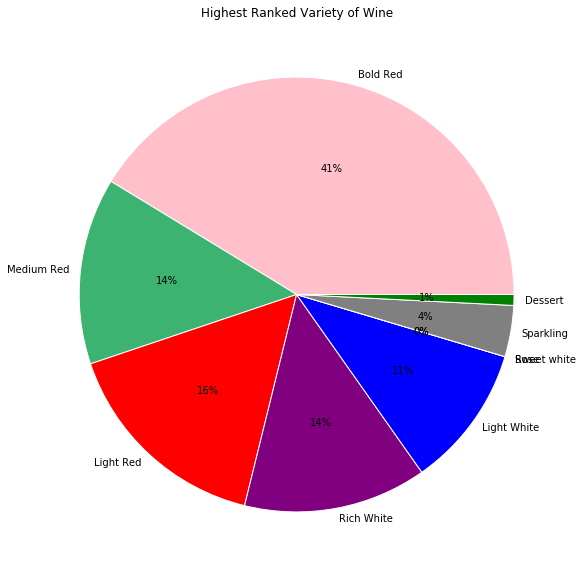

In [64]:
sizes = (bold_count, medium_red_count, light_red_count, rich_white_count,light_white_count, sweet_white_count, rose_count, sparkling_count,dessert_count  )

#sizes = sorted(sizes)

labels = 'Bold Red','Medium Red', 'Light Red','Rich White', 'Light White','Sweet white','Rose','Sparkling','Dessert'
colors = [ 'Pink', 'mediumseagreen', 'red', 'purple', 'blue', 'orange', 'yellow', 'grey', 'green']

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

pie_wedge_collection = ax.pie(sizes, colors=colors, labels=labels, autopct="%1.00f%%",labeldistance=1.05);

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

ax.set_title("Highest Ranked Variety of Wine");

In [28]:
#determine which variety has the highest points
df_taster_points = df_2.groupby(["taster_name"]).mean()
df_taster_points = df_taster_points.reset_index()
df_taster_points.head()


,taster_name,points,price
0,Alexander Peartree,85.854722,29.053269
1,Anna Lee C. Iijima,88.405127,29.790112
2,Anne Krebiehl MW,90.612570,31.244910
3,Carrie Dykes,86.384058,30.753623
4,Christina Pickard,87.833333,29.333333


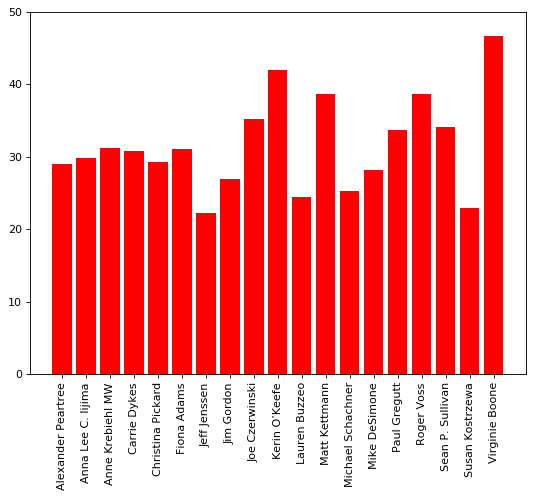

In [34]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.bar(df_taster_points["taster_name"], df_taster_points["price"], color='r')
plt.ylim([0, 50])
plt.xticks(rotation=90)
plt.show()

In [30]:
df_variety = df_2.groupby(["country"]).mean()
df_variety = df_variety.reset_index()
df_variety.head()


,country,points,price
0,Argentina,86.710330,24.510117
1,Armenia,87.500000,14.500000
2,Australia,88.595466,35.437663
3,Austria,90.190782,30.762772
4,Bosnia and Herzegovina,86.500000,12.500000


Text(0.5, 1.0, 'Country vs. Points')

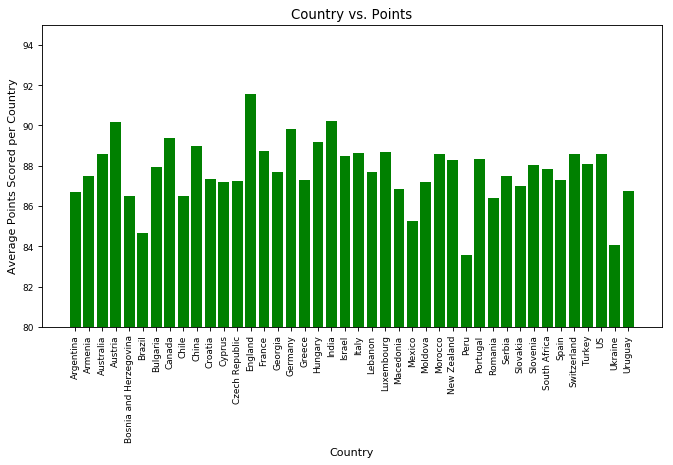

In [31]:
#l1= ax.bar(df_variety["country"], df_variety["points"], color='g')
fig, ax= plt.subplots(num=1,figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
l1= ax.bar(df_variety["country"], df_variety["points"], color='g')
plt.ylim([80,95])
plt.xticks(rotation=90, fontsize=5)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Average Points Scored per Country")
plt.title("Country vs. Points")
 

Text(0.5, 1.0, 'Country vs. Price')

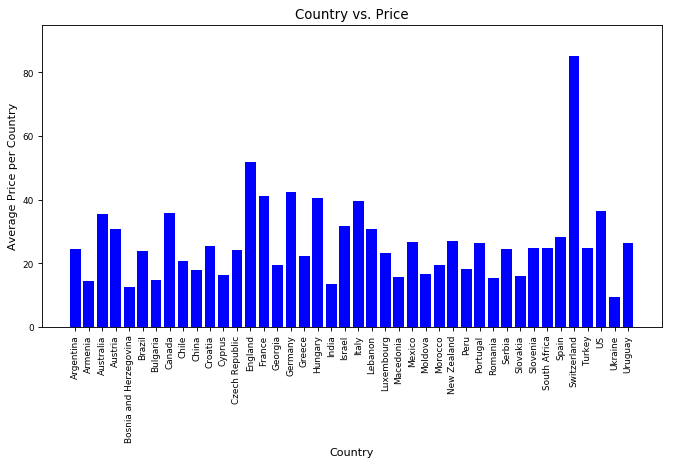

In [32]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')

plt.bar(df_variety["country"], df_variety["price"], color='b')
plt.ylim([0,95])
plt.xticks(rotation=90, fontsize=5)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Average Price per Country")
plt.title("Country vs. Price")

In [35]:
Wine_types={'Bold Red': ['Malbec', 'Syrah', 'Shiraz', 'Mourvedre', 'Pinotage', 'Petite Sirah', 'Touriga Nacional', 'Cabernet Sauvignon', 'Bordeaux Blend', 'Meritage'],
          'Medium Red': ['Meriot', 'Sangiovese', 'Zinfandel','Cabernet Franc', 'Tempranillo', 'Nebbiolo', 'Barbera', 'Cotes du Rhone Blend'],
          'Light Red':[ 'Pinot Noir', 'Grenache', 'Gamay', 'St. Laurent', 'Carignan', 'Counoise'],
          'Rich White': ['Chardonnay', 'Semillon','Viognier', 'Marsanne', 'Roussanne'],
          'Light White': ['Sauvignon Blanc', 'Albarino', 'Pitot Blanc', 'Vermentino', 'Melon de Bourgogne', 'Gargenega', 'Trebbiano', 'Pinot Gris', 'Pinot Grigio'],
          'Sweet White': ['Moscato', 'Riesling', 'Chenin Blanc', 'Gewurztraminer', 'Late Harvest Whites', 'Alascian Pinot Gris'],
          'Rose': ['Provencal Rose', 'White Zinfandel', 'Loire Valley Rose', 'Pinot Noir Rose', 'Syrah Rose', 'Garnache Rosado', 'Bandol Rose', 'Tempranilio Rose', 'Saignee Method Rose'],
          'Sparkling': ['Champagne', 'Prosecco', 'Cremant', 'Cava', 'Metodo Classico', 'Sparkling Wine', 'Sparkling Rose'],
          'Dessert': ['Port', 'Sherry', 'Maderia', 'Vin Santo', 'Muscat', 'PX', 'Pedro Ximenez']
          }
Wine_types.keys()


dict_keys(['Bold Red', 'Medium Red', 'Light Red', 'Rich White', 'Light White', 'Sweet White', 'Rose', 'Sparkling', 'Dessert'])

In [46]:

df_variety=pd.DataFrame()
for x in Wine_types.keys():
   wt=pd.DataFrame([])
   for y in range(len(Wine_types[x])):
       print('type=',x,'subtype=',Wine_types[x][y])
       wt=wt.append(df_2[df_2.variety.str.contains(Wine_types[x][y],na=False)])
       wt.head()
   wt.variety=x
   df_variety=df_variety.append(wt)

df_variety.groupby('variety')['price'].apply(lambda x: x.count())


type= Bold Red subtype= Malbec
type= Bold Red subtype= Syrah
type= Bold Red subtype= Shiraz
type= Bold Red subtype= Mourvedre
type= Bold Red subtype= Pinotage
type= Bold Red subtype= Petite Sirah
type= Bold Red subtype= Touriga Nacional
type= Bold Red subtype= Cabernet Sauvignon
type= Bold Red subtype= Bordeaux Blend
type= Bold Red subtype= Meritage
type= Medium Red subtype= Meriot
type= Medium Red subtype= Sangiovese
type= Medium Red subtype= Zinfandel
type= Medium Red subtype= Cabernet Franc
type= Medium Red subtype= Tempranillo
type= Medium Red subtype= Nebbiolo
type= Medium Red subtype= Barbera
type= Medium Red subtype= Cotes du Rhone Blend
type= Light Red subtype= Pinot Noir
type= Light Red subtype= Grenache
type= Light Red subtype= Gamay
type= Light Red subtype= St. Laurent
type= Light Red subtype= Carignan
type= Light Red subtype= Counoise
type= Rich White subtype= Chardonnay
type= Rich White subtype= Semillon
type= Rich White subtype= Viognier
type= Rich White subtype= Marsanne

variety
Bold Red       1503
Dessert        1147
Light Red       444
Light White     182
Medium Red     1457
Rich White      497
Sweet White      96
Name: price, dtype: int64

In [51]:
df_variety.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Rating
1038,New Zealand,"This lacks a bit of midpalate richness, but ot...",Gimblett Gravels Reserve,87,20.0,Hawke's Bay,NaN,NaN,Joe Czerwinski,@JoeCz,Mills Reef 2012 Gimblett Gravels Reserve Merlo...,Bold Red,Mills Reef,85 to 89
1944,France,"Great value, simple and fruity, this is a ripe...",K-nom,87,13.0,Southwest France,Cahors,NaN,Roger Voss,@vossroger,Clos Troteligotte 2011 K-nom Malbec-Merlot (Ca...,Bold Red,Clos Troteligotte,85 to 89
1991,Argentina,Initial plum and berry aromas fall off with ai...,NaN,84,15.0,Mendoza Province,Uco Valley,NaN,Michael Schachner,@wineschach,Ricominciare 2010 Malbec-Tannat (Uco Valley),Bold Red,Ricominciare,80-84
1992,Argentina,"Aromas of latex, plastic, clove and wild berry...",NaN,84,20.0,Mendoza Province,Uco Valley,NaN,Michael Schachner,@wineschach,Ricominciare 2011 Malbec-Cabernet Franc (Uco V...,Bold Red,Ricominciare,80-84
3749,France,Produced from 20- to 30-year-old vines on terr...,NaN,86,13.0,Southwest France,Cahors,NaN,Roger Voss,@vossroger,Château Nozières 2014 Malbec-Merlot (Cahors),Bold Red,Château Nozières,85 to 89


In [54]:
df_3 = df_variety["variety"].value_counts()
df_3

Bold Red       1503
Medium Red     1457
Dessert        1147
Rich White      497
Light Red       444
Light White     182
Sweet White      96
Name: variety, dtype: int64

In [56]:
bold_red = df_variety.loc[df_variety['variety']=='Bold Red']
bold_red_count = bold_red["variety"].count()

medium_red = df_variety.loc[df_variety['variety']=='Medium Red']
medium_red_count = medium_red["variety"].count()

light_red = df_variety.loc[df_variety['variety']== 'Light Red']
light_red_count = light_red['variety'].count()

rich_white = df_variety.loc[df_variety['variety']=='Rich White']
rich_white_count = rich_white["variety"].count()

light_white = df_variety.loc[df_variety['variety']=='Light White']
light_white_count = light_white["variety"].count()

sweet_white = df_variety.loc[df_variety['variety']=='Sweet white']
sweet_white_count = sweet_white["variety"].count()

rose = df_variety.loc[df_variety['variety']=='Rose'] 
rose_count = rose["variety"].count()

sparkling = df_variety.loc[df_variety['variety']=='Sparkling']
sparkling_count = sparkling["variety"].count()

dessert = df_variety.loc[df_variety['variety']=='Dessert']
dessert_count = dessert["variety"].count()



In [57]:
df_total = df_variety["variety"].count()

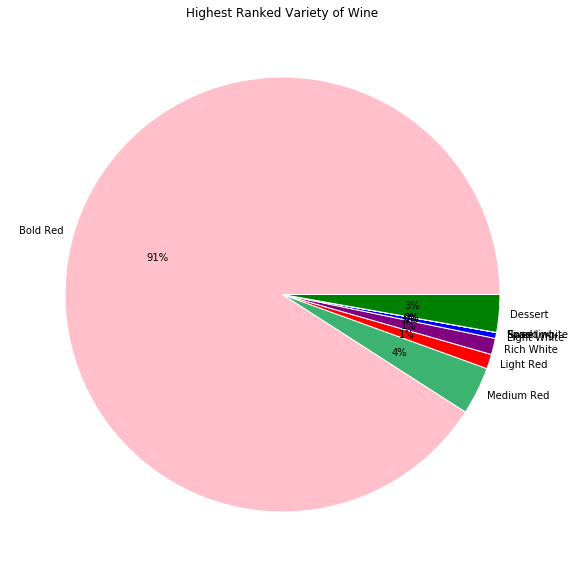

In [58]:
sizes = (bold_count, medium_red_count, light_red_count, rich_white_count,light_white_count, sweet_white_count, rose_count, sparkling_count,dessert_count  )

#sizes = sorted(sizes)

labels = 'Bold Red','Medium Red', 'Light Red','Rich White', 'Light White','Sweet white','Rose','Sparkling','Dessert'
colors = [ 'Pink', 'mediumseagreen', 'red', 'purple', 'blue', 'orange', 'yellow', 'grey', 'green']

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

pie_wedge_collection = ax.pie(sizes, colors=colors, labels=labels, autopct="%1.00f%%",labeldistance=1.05);

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

ax.set_title("Highest Ranked Variety of Wine");
